In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import ssl
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import fitz
import string

In [19]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/stan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:

# initialize VADER
sid = SentimentIntensityAnalyzer()

# let's assume you have a sentence from the ESG report
sentence = "The company has made significant progress in reducing their carbon footprint."

# get the sentiment scores
sentiment_scores = sid.polarity_scores(sentence)

# print the sentiment scores
print(sentiment_scores)

{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.5574}


{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.5574}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


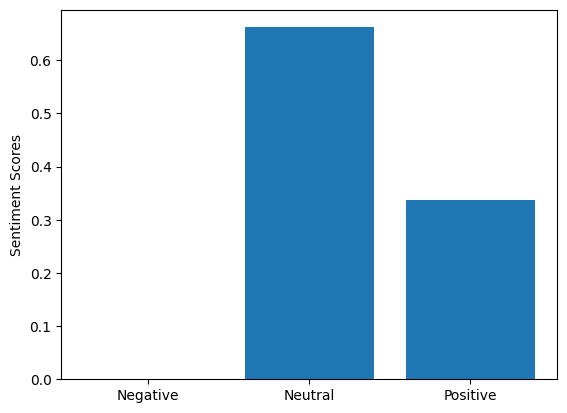

In [7]:
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Let's assume 'text' is the content of the entire ESG report
text = "The company has made significant progress in reducing their carbon footprint."

# Get the sentiment scores
sentiment_scores = sid.polarity_scores(text)

# Print the sentiment scores
print(sentiment_scores)

# Visualize sentiment scores
labels = ['Negative', 'Neutral', 'Positive']
scores = [sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos']]

plt.bar(labels, scores)
plt.ylabel('Sentiment Scores')
plt.show()


In [21]:
file_path = 'ESG Reports/2022_Apple_ESG_Report.pdf'

In [22]:
def cleanup_text(text):
    # remove non-breaking spaces
    text = text.replace(u'\xa0', u' ')
    # remove bullet points
    text = text.replace(u'•', u'')
    # remove any non-alphanumeric, non-hyphen characters
    text = re.sub(r'[^A-Za-z0-9- ]', '', text)
    # remove words with hyphens, as they could be compound words
    text = re.sub(r'\w+-\w+', '', text)
    return text

In [23]:
def text_process(text_str):
    # handle punctuation and special characters
    text_str = re.sub(r'[^\w\s]', '', text_str)
    if '-' in text_str:
        text_str = text_str.replace('- ', '').replace(' -', '').replace(' ,', ',').replace(' .', '.')
    text_str = text_str.strip()
    return text_str

In [24]:
all_text = []
stop_words = set(stopwords.words('english'))

with fitz.open(file_path) as doc:
    for page in doc:
        text = page.get_text()
        # text = cleanup_text(text)  # Apply cleanup_text here
        text = text.replace('•', ' ')
        text = text_process(text)
        text = text.replace('\n', ' ')
        text = text.replace('\u2003', ' ')
        text = text.strip()
        all_text.append(text)


lemmatizer = WordNetLemmatizer()
processed_text = []

for doc in all_text:
    tokens = word_tokenize(doc.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token not in string.punctuation]
    no_stops = [token for token in lemmatized if token not in stop_words]
    cleaned_doc = " ".join(no_stops)
    cleaned_doc = re.sub(r'\d+', '', cleaned_doc) # remove digits from each document
    cleaned_doc = re.sub(' +', ' ', cleaned_doc) # remove extra spaces from each document
    processed_text.append(cleaned_doc)

doc_list = [doc.split() for doc in processed_text]

In [27]:
processed_text

['apple esg report environmental social governance report',
 'introduction letter tim cook report highlight approach commitment transparency advocating change commitment human right environment approach climate change resource smarter chemistry people approach inclusion diversity growth development benefit compensation engagement workplace practice policy health safety apple supplier approach labor human right supply chain health safety wellness responsible material sourcing education professional development environment customer approach privacy accessibility inclusive design education health caring customer community approach racial equity justice initiative education affordable housing initiative corporate donation employee giving job creation governance corporate governance ethic compliance tax payment appendix award recognition united nation sustainable development goal stakeholder engagement esg data summary report endnotes esg index report contains forwardlooking statement actua

{'neg': 0.033964705882352925, 'neu': 0.751635294117647, 'pos': 0.21438823529411768, 'compound': 0.9061635294117647}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


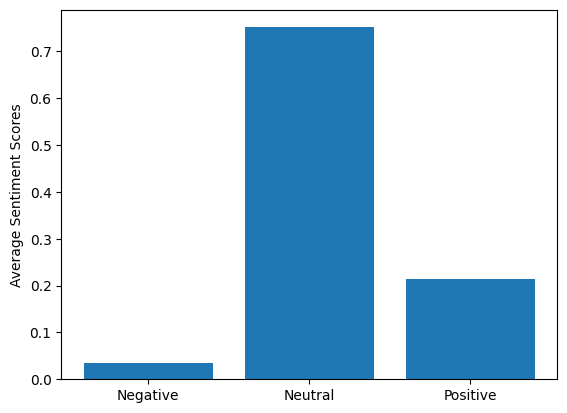

In [29]:

import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()



# Apply VADER to each sentence and store the scores
sentiment_scores = []
for sentence in processed_text:
    scores = sid.polarity_scores(sentence)
    sentiment_scores.append(scores)

# Now, sentiment_scores is a list of dictionaries, where each dictionary contains the sentiment scores for one sentence.

# If you want, you can now aggregate these scores to get an overall sentiment for the entire text.
overall_sentiment = {
    'neg': sum(score['neg'] for score in sentiment_scores) / len(sentiment_scores),
    'neu': sum(score['neu'] for score in sentiment_scores) / len(sentiment_scores),
    'pos': sum(score['pos'] for score in sentiment_scores) / len(sentiment_scores),
    'compound': sum(score['compound'] for score in sentiment_scores) / len(sentiment_scores)
}

# Print the overall sentiment
print(overall_sentiment)

# Visualize sentiment scores
labels = ['Negative', 'Neutral', 'Positive']
scores = [overall_sentiment['neg'], overall_sentiment['neu'], overall_sentiment['pos']]

plt.bar(labels, scores)
plt.ylabel('Average Sentiment Scores')
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


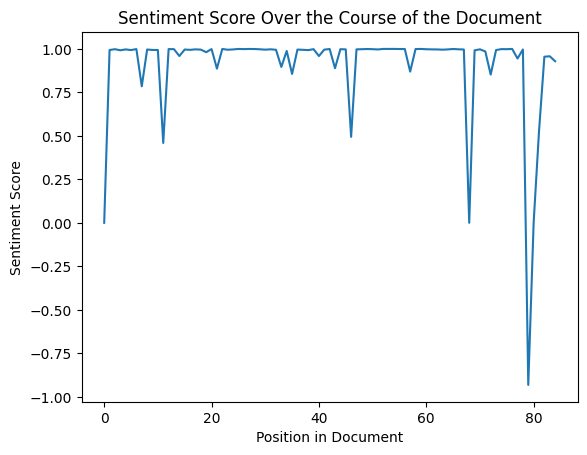

In [30]:
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Here's your list of sentences


# Apply VADER to each sentence and store the scores
sentiment_scores = [sid.polarity_scores(sentence) for sentence in processed_text]

# Extract compound scores
compound_scores = [score['compound'] for score in sentiment_scores]

# Create a line plot of sentiment scores over time
plt.plot(compound_scores)
plt.xlabel('Position in Document')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over the Course of the Document')
plt.show()
